In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams ['figure.dpi'] = 150

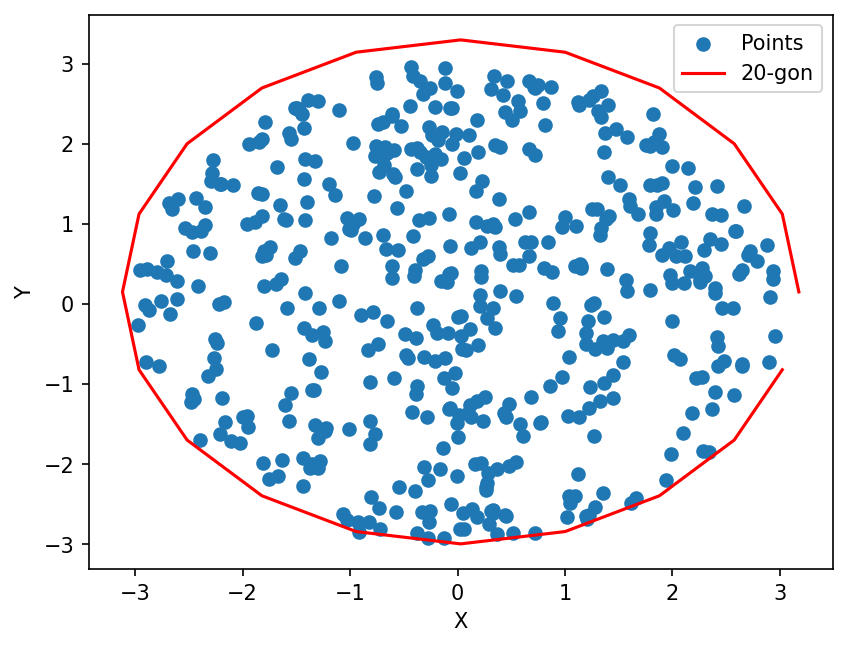

In [2]:
def plot_ngon(points, n):
    """
    Plot an n-gon around a 2D scatter plot of points.

    Parameters:
    -----------
    points : numpy.ndarray
        Shape (N, 2) array of (x, y) coordinates of the points.
    n : int
        Number of vertices for the n-gon.
    """
    # Calculate the center of the points
    center_x, center_y = np.mean(points, axis=0)

    # Calculate angles for the n-gon vertices
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)

    # Calculate the coordinates of the vertices
    x_vertices = center_x + np.cos(angles) * np.max(np.linalg.norm(points - [center_x, center_y], axis=1))
    y_vertices = center_y + np.sin(angles) * np.max(np.linalg.norm(points - [center_x, center_y], axis=1))

    # Plot the scatter plot of points
    plt.scatter(points[:, 0], points[:, 1], label='Points')

    # Plot the n-gon
    plt.plot(x_vertices, y_vertices, 'r-', label=f'{n}-gon')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

def distribute_points_in_disk(n, radius):
    """
    Distribute n points evenly in a disk.

    Parameters:
    -----------
    n : int
        Number of points.
    radius : float
        Radius of the disk.

    Returns:
    --------
    points : numpy.ndarray
        Shape (n, 2) array of (x, y) coordinates of the points.
    """
    angles = 2 * np.pi * np.random.random(n)
    sqrt_r = np.sqrt(np.random.random(n))  # Square root of a random number [0, 1)

    x = radius * sqrt_r * np.cos(angles)
    y = radius * sqrt_r * np.sin(angles)
    points = np.column_stack((x, y))
    return points

# Example usage
n = 100  # Number of points
radius = 5  # Radius of the disk

# Distribute points in a disk
points = distribute_points_in_disk(n, radius)

# Example usage
points = distribute_points_in_disk(500,3)
n = 20  # Number of vertices for the n-gon
plot_ngon(points, n)

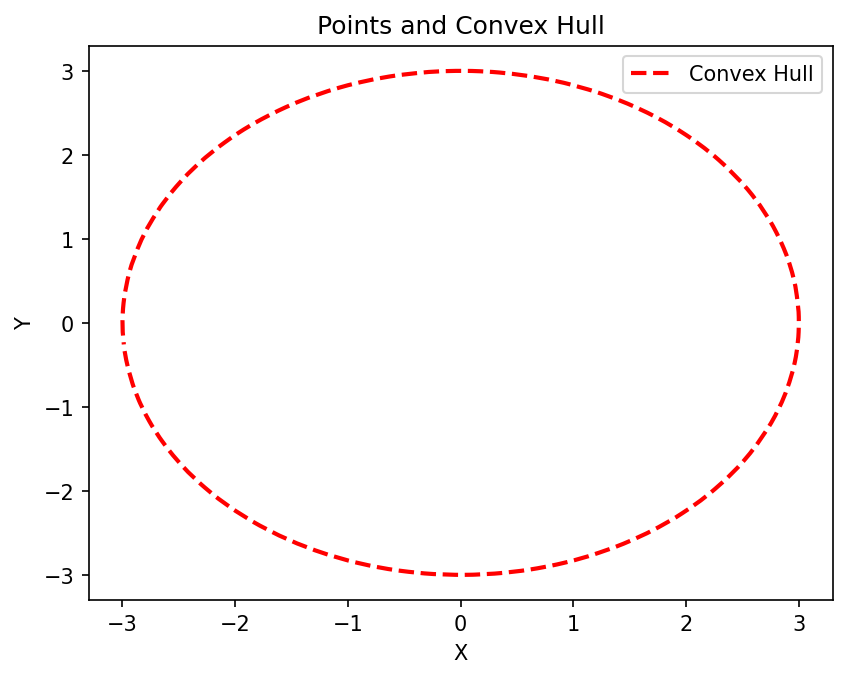

[125796 318477  46027  40736   6465  65103  63608 147739 457587  46797
 423967  14339 147006 228993 208095 159844 199757 194150 449581 295287
 494037 491710 325914 113142  48447 171340  81601  93999 426470 162012
  84844 318230 306662 157502 126264 237995 330064 215180  50959 336819
 376999 110577 417173  17896 333780 324104 258866 248099  83170 105065
 407023   3293 137405 205398 401664  17675 306048  61617 113300  74045
   5008   3663 391033 302342 254752 109702 195449 374450 271716 339856
 262901  79651 297509 265796 497974 291173 292461 392684 111016  18789
 302207  52927 260066  40604  42128 312604 495956 290049 193990 213701
 239454 305571 298658 315239 345157 344903 253002 317577 213952 300653
    103 491315 428060 497973  30135 207953 159244 437891 491267 486919
 310926 443041 456481 188615 196254  11345 111080 199943  66789  52255
 244358 336247 418666 327374 351383 392969 282636 197049  59529 207331
  48246  53991   9377  82974 454117 299378  22319 392294 102789  20533
 22748

In [8]:
from scipy.spatial import ConvexHull
points = distribute_points_in_disk(500000,3)

hull = ConvexHull(points)

# Compute the convex hull
hull = ConvexHull(points)

# Plot the points
#plt.scatter(points[:, 0], points[:, 1], label='Points')

# Plot the convex hull
plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r--', lw=2, label='Convex Hull')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Points and Convex Hull')
plt.show()
print(hull.vertices)

In [13]:
def isInHull(P,hull):
    '''
    list of points P lies inside the hull
    :return: list
    List of boolean where true means that the point is inside the convex hull
    '''
    A = hull.equations[:,0:-1]
    print(A.shape)
    b = np.transpose(np.array([hull.equations[:,-1]]))
    print(b.shape)
    print(np.tile(-b,(1,len(P))).shape)
    isInHull = np.all((A @ np.transpose(P)) <= np.tile(-b,(1,len(P))),axis=0)
    return isInHull
isInHull([[0,2]],hull)

(64, 2)
(64, 1)
(64, 1)


array([ True])

NameError: name 'A' is not defined